In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt



In [2]:
# Imposta un seed per la riproducibilità
np.random.seed(42)

# Genera dati sintetici
n_samples = 500

# Variabili categoriche
sesso = np.random.choice(['M', 'F'], size=n_samples)
regione_residenza = np.random.choice(['Nord', 'Centro', 'Sud'], size=n_samples)
tipologia_professionista_sanitario = np.random.choice(['Medico', 'Infermiere', 'Tecnico'], size=n_samples)

# Variabili numeriche
eta = np.random.randint(20, 65, size=n_samples)
num_servizi = np.random.poisson(lam=5, size=n_samples)

# Variabile target (incremento)
incremento = (eta * 0.2) + (num_servizi * 2) + np.random.normal(0, 10, size=n_samples)

# Creazione del DataFrame
df = pd.DataFrame({
    'sesso': sesso,
    'regione_residenza': regione_residenza,
    'tipologia_professionista_sanitario': tipologia_professionista_sanitario,
    'eta': eta,
    'num_servizi': num_servizi,
    'incremento': incremento
})

df.head()


,sesso,regione_residenza,tipologia_professionista_sanitario,eta,num_servizi,incremento
0,M,Sud,Infermiere,38,3,9.858197
1,F,Nord,Medico,55,2,13.444343
2,M,Nord,Medico,48,5,27.261960
3,M,Sud,Infermiere,37,4,25.504138
4,M,Nord,Infermiere,21,5,26.437103


In [6]:
from sklearn.preprocessing import OneHotEncoder
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Seleziona le colonne categoriche
categorical_cols = ['sesso', 'regione_residenza', 'tipologia_professionista_sanitario']

# One-Hot Encoding
encoder = OneHotEncoder(drop='first')
encoded_categorical_cols = encoder.fit_transform(df[categorical_cols])

# Converti in DataFrame
encoded_df = pd.DataFrame(encoded_categorical_cols.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Unisci con le colonne numeriche
X = pd.concat([encoded_df, df[['eta', 'num_servizi']]], axis=1)
y = df['incremento']


In [11]:
# Inizializza e addestra il modello
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Ottieni l'importanza delle feature
feature_importance = model.feature_importances_

# Creazione di un DataFrame per visualizzare i risultati
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
5,eta,0.428487
6,num_servizi,0.293598
0,sesso_M,0.067558
1,regione_residenza_Nord,0.057510
4,tipologia_professionista_sanitario_Tecnico,0.052137
2,regione_residenza_Sud,0.051796
3,tipologia_professionista_sanitario_Medico,0.048913


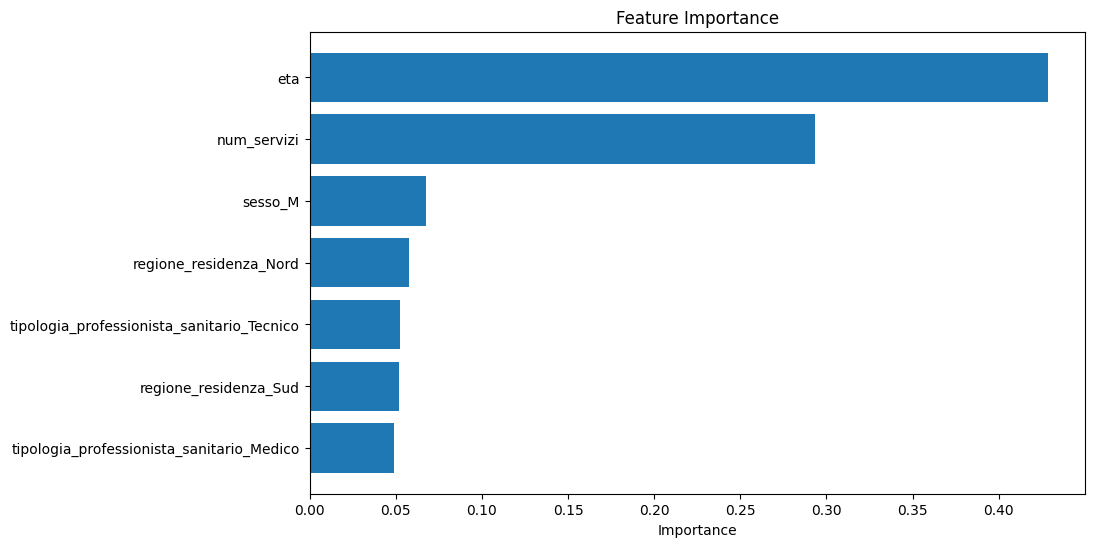

In [12]:
# Visualizzazione con un grafico a barre
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()
